# Math - Linear Algebra

Linear Algebra is the branch of mathematics that studies vector spaces and linear transformations between vector spaces, such as rotating a shape, scaling it up or down, translating it (i.e. moving it), etc.

Machine Learning relies heavily on Linear Algebra, so it is essential to understand what vectors and matrices are, what operations you can perform with them, and how they can be useful.

markdown
Copy code
# Vectors

## Definition

A vector is a quantity defined by a magnitude and a direction. For example, a rocket's velocity is a 3-dimensional vector: its magnitude is the speed of the rocket, and its direction is (hopefully) up. A vector can be represented by an array of numbers called scalars. Each scalar corresponds to the magnitude of the vector with respect to each dimension.

For example, say the rocket is going up at a slight angle: it has a vertical speed of 5,000 m/s, and also a slight speed towards the East at 10 m/s, and a slight speed towards the North at 50 m/s. The rocket's velocity can be represented by the following vector:

$$
\text{velocity} =
\begin{bmatrix}
10 \\
50 \\
5000
\end{bmatrix}
$$

Note: by convention, vectors are generally presented in the form of columns. Also, vector names are usually lowercase to distinguish them from matrices (which we will discuss below) and in bold (when possible) to distinguish them from simple scalar values such as `meters_per_second = 5026`.

A list of N numbers may also represent the coordinates of a point in an N-dimensional space, so it is quite frequent to represent vectors as simple points instead of arrows. A vector with 1 element may be represented as an arrow or a point on an axis, a vector with 2 elements is an arrow or a point on a plane, a vector with 3 elements is an arrow or a point in space, and a vector with N elements is an arrow or a point in an N-dimensional space... which most people find hard to imagine.

## Purpose

Vectors have many purposes in Machine Learning, most notably to represent observations and predictions. For example, say we built a Machine Learning system to classify videos into 3 categories (good, spam, clickbait) based on what we know about them. For each video, we would have a vector representing what we know about it, such as:

$$
\text{video} =
\begin{bmatrix}
10.5 \\
5.2 \\
3.25 \\
7.0
\end{bmatrix}
$$

This vector could represent a video that lasts 10.5 minutes, but only 5.2% viewers watch for more than a minute, it gets 3.25 views per day on average, and it was flagged 7 times as spam. As you can see, each axis may have a different meaning.

Based on this vector, our Machine Learning system may predict that there is an 80% probability that it is a spam video, 18% that it is clickbait, and 2% that it is a good video. This could be represented as the following vector:

$$
\text{class\_probabilities} =
\begin{bmatrix}
0.80 \\
0.18 \\
0.02
\end{bmatrix}
$$



## Vectors in python
In python, a vector can be represented in many ways, the simplest being a regular python list of numbers:

In [1]:
[10.5, 5.2, 3.25, 7.0]

[10.5, 5.2, 3.25, 7.0]

Since we plan to do quite a lot of scientific calculations, it is much better to use NumPy's ndarray, which provides a lot of convenient and optimized implementations of essential mathematical operations on vectors (for more details about NumPy, check out the NumPy tutorial). For example:

In [2]:
import numpy as np

video = np.array([10.5, 5.2, 3.25, 7.0])
video

array([10.5 ,  5.2 ,  3.25,  7.  ])

The size of a vector can be obtained using the size attribute:

In [3]:
video.size

4

The $i^{th}$ element (also called entry or item) of a vector $\textbf{v}$ is noted $\textbf{v}_i$

Note that indices in mathematics generally start at 1, but in programming they usually start at 0. So to access 
 $textbf{video}_3$ programmatically, we would write:

In [4]:
video[2]  # 3rd element

3.25

## Plotting vectors
To plot vectors we will use matplotlib, so let's start by importing it (for details about matplotlib, check the matplotlib tutorial):

In [5]:
import matplotlib.pyplot as plt

## 2D vectors
Let's create a couple of very simple 2D vectors to plot:

In [6]:
u = np.array([2, 5])
v = np.array([3, 1])

These vectors each have 2 elements, so they can easily be represented graphically on a 2D graph, for example as points:

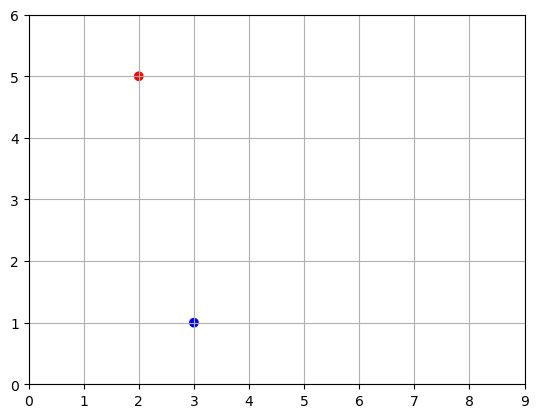

In [7]:
x_coords, y_coords = zip(u, v)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Vectors can also be represented as arrows. Let's create a small convenience function to draw nice arrows:

In [8]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Now let's draw the vectors $\textbf{u}$ and $\textbf{v}$  as arrows:

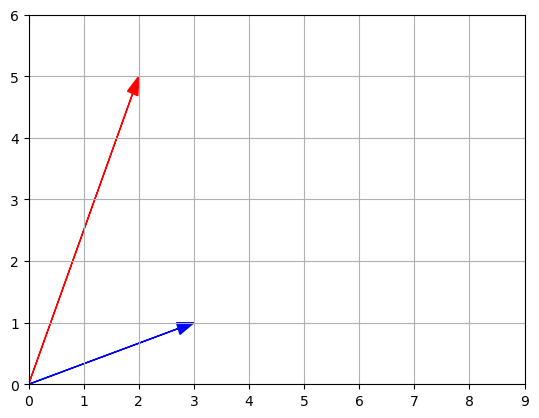

In [9]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

## 3D vectors
Plotting 3D vectors is also relatively straightforward. First, let's create two 3D vectors:

In [10]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Now let's plot them using matplotlib's Axes3D:

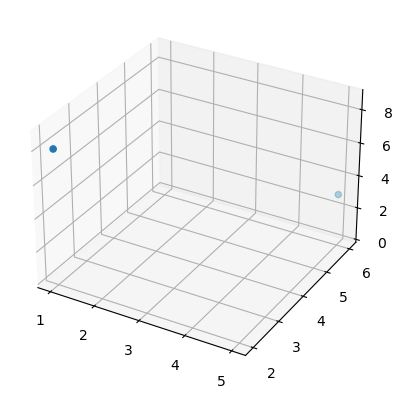

In [11]:
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

It is a bit hard to visualize exactly where in space these two points are, so let's add vertical lines. We'll create a small convenience function to plot a list of 3d vectors with vertical lines attached:

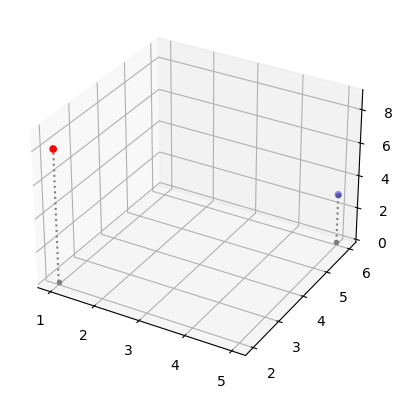

In [12]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norm

The norm of a vector **u**, noted ||**u**||, is a measure of the length (a.k.a. the magnitude) of **u**. There are multiple possible norms, but the most common one (and the only one we will discuss here) is the Euclidean norm, which is defined as:

$||\textbf{u}|| = \sqrt{\sum_i \textbf{u}_i^2} $

That's the square root of the sum of all the squares of the components of **u**. We could implement this easily in pure Python, recalling that

$\sqrt{x} = x^{1/2}$

In [13]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)


|| [2 5] || =


5.385164807134504

However, it is much more efficient to use NumPy's norm function, available in the linalg (Linear Algebra) module:

In [14]:
import numpy.linalg as LA

LA.norm(u)

5.385164807134504

Let's plot a little diagram to confirm that the length of vector u
 is indeed 
5.4

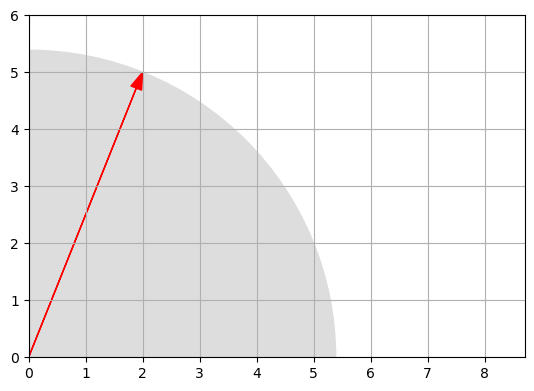

In [15]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Looks about right!

## Addition
Vectors of same size can be added together. Addition is performed elementwise:

In [16]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Let's look at what vector addition looks like graphically:

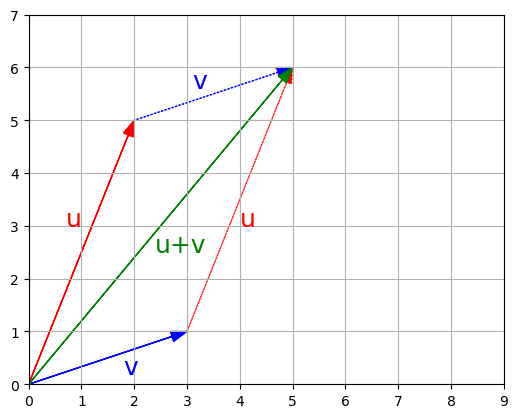

In [17]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.gca().set_aspect("equal")
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()
plt.show()

Vector addition is \textbf{commutative}, meaning that 
$$ \mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}. $$
You can see it on the previous image: following $\mathbf{u}$ then $\mathbf{v}$ leads to the same point as following $\mathbf{v}$ then $\mathbf{u}$.

Vector addition is also $\textbf{associative}$, meaning that 
$$ \mathbf{u} + (\mathbf{v} + \mathbf{w}) = (\mathbf{u} + \mathbf{v}) + \mathbf{w}. $$

If you have a shape defined by a number of points (vectors), and you add a vector $\mathbf{v}$ to all of these points, then the whole shape gets shifted by $\mathbf{v}$. This is called a $\textbf{geometric translation}$.


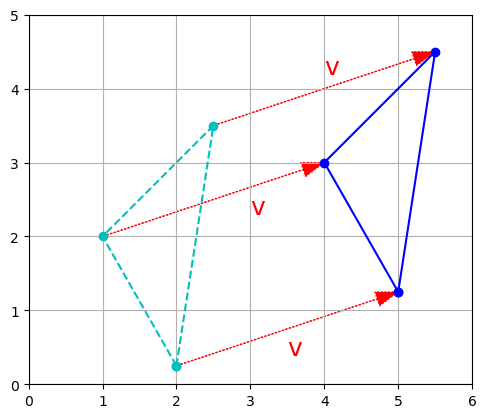

In [18]:
import numpy as np

t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Finally, subtracting a vector is like adding the opposite vector.

## Multiplication by a scalar
Vectors can be multiplied by scalars. All elements in the vector are multiplied by that number, for example:

In [19]:
print("1.5 *", u, "=")

1.5 * u

1.5 * [2 5] =


array([3. , 7.5])

Graphically, scalar multiplication results in changing the scale of a figure, hence the name scalar. The distance from the origin (the point at coordinates equal to zero) is also multiplied by the scalar. For example, let's scale up by a factor of k = 2.5:

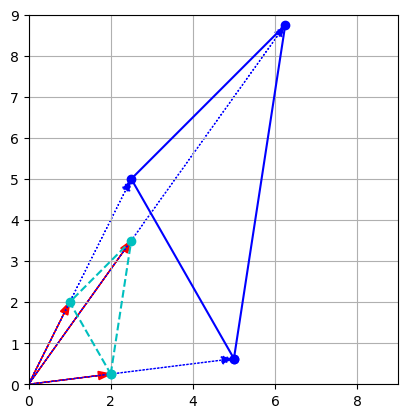

In [20]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")#
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()


As you might guess, dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):

$$
\frac{\mathbf{u}}{\lambda} = \frac{1}{\lambda} \times \mathbf{u}
$$

Scalar multiplication is **commutative**: 

$$
\lambda \times \mathbf{u} = \mathbf{u} \times \lambda
$$

It is also **associative**: 

$$
\lambda_1 \times (\lambda_2 \times \mathbf{u}) = (\lambda_1 \times \lambda_2) \times \mathbf{u}
$$

Finally, it is **distributive** over addition of vectors: 

$$
\lambda \times (\mathbf{u} + \mathbf{v}) = \lambda \times \mathbf{u} + \lambda \times \mathbf{v}
$$

### Zero, unit and normalized vectors

- A **zero-vector** is a vector full of 0s.
- A **unit vector** is a vector with a norm equal to 1.
- The **normalized vector** of a non-null vector $\mathbf{v}$, noted $\hat{\mathbf{v}}$, is the unit vector that points in the same direction as $\mathbf{v}$. It is equal to:

$$
\hat{\mathbf{v}} = \frac{\mathbf{v}}{\|\mathbf{v}\|}
$$



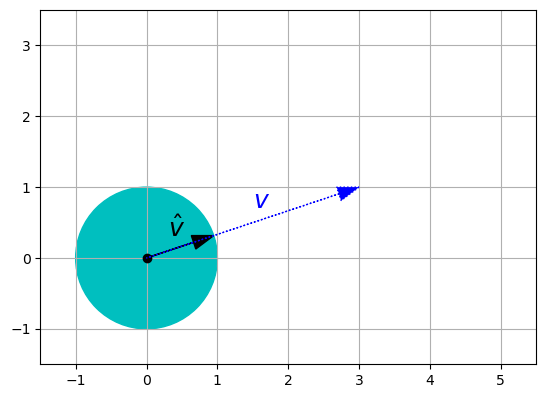

In [21]:
plt.gca().add_artist(plt.Circle((0, 0), 1, color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k", zorder=10)
plot_vector2d(v, color="b", linestyle=":", zorder=15)
plt.text(0.3, 0.3, r"$\hat{v}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()


# Dot product

## Definition

The dot product (also called *scalar product* or *inner product* in the context of the Euclidean space) of two vectors **u** and **v** is a useful operation that comes up fairly often in linear algebra. It is noted **u · v**, or sometimes ⟨**u**|**v**⟩ or (**u**|**v**), and it is defined as:

$$ \mathbf{u} \cdot \mathbf{v} = \|\mathbf{u}\| \times \|\mathbf{v}\| \times \cos(\theta) $$

where \( \theta \) is the angle between **u** and **v**.

Another way to calculate the dot product is:

$$ \mathbf{u} \cdot \mathbf{v} = \sum_{i} u_i \times v_i $$

## In Python

The dot product is pretty simple to implement:

In [22]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

11

But a much more efficient implementation is provided by NumPy with the np.dot() function:

In [23]:
np.dot(u, v)

11

Equivalently, you can use the dot method of ndarrays:

In [24]:
u.dot(v)

11

**Caution**: the * operator will perform an elementwise multiplication, NOT a dot product:

In [25]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

   [2 5]
*  [3 1] (NOT a dot product)
----------


array([6, 5])

## Main properties

- The dot product is **commutative**:  
  $$ \mathbf{u} \cdot \mathbf{v} = \mathbf{v} \cdot \mathbf{u} $$
- The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products:  
  For example, the expression **u · v · w** is not defined since **u · v** is a scalar and **w** is a vector.
- This also means that the dot product is **NOT associative**:  
  \[
  (\mathbf{u} \cdot \mathbf{v}) \cdot \mathbf{w} \neq \mathbf{u} \cdot (\mathbf{v} \cdot \mathbf{w})
  \]
  since neither are defined.
- However, the dot product is **associative with regards to scalar multiplication**:  
  $$ \lambda \times (\mathbf{u} \cdot \mathbf{v}) = (\lambda \times \mathbf{u}) \cdot \mathbf{v} = \mathbf{u} \cdot (\lambda \times \mathbf{v}) $$
- Finally, the dot product is **distributive** over addition of vectors:  
  $$ \mathbf{u} \cdot (\mathbf{v} + \mathbf{w}) = \mathbf{u} \cdot \mathbf{v} + \mathbf{u} \cdot \mathbf{w} $$

## Calculating the angle between vectors

One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$$ \theta = \arccos \left( \frac{\mathbf{u} \cdot \mathbf{v}}{\|\mathbf{u}\| \times \|\mathbf{v}\|} \right) $$

Note that if \( \mathbf{u} \cdot \mathbf{v} = 0 \), it follows that \( \theta = \frac{\pi}{2} \). In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between **u** and **v** (in radians):

In [26]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(cos_theta.clip(-1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Angle = 0.8685393952858895 radians
      = 49.76364169072618 degrees


Note: due to small floating point errors, `cos_theta` may be very slightly outside the \([-1,1]\) interval, which would make `arccos` fail. This is why we clipped the value within the range, using NumPy's `clip` function.

## Projecting a point onto an axis

The dot product is also very useful to project points onto an axis. The projection of vector **v** onto **u**'s axis is given by this formula:

$$ \text{proj}_{\mathbf{u}} \mathbf{v} = \frac{\mathbf{u} \cdot \mathbf{v}}{||\mathbf{u}||^2} \times \mathbf{u} $$

Which is equivalent to:

$$ \text{proj}_{\mathbf{u}} \mathbf{v} = (\mathbf{v} \cdot \hat{\mathbf{u}}) \times \hat{\mathbf{u}} $$


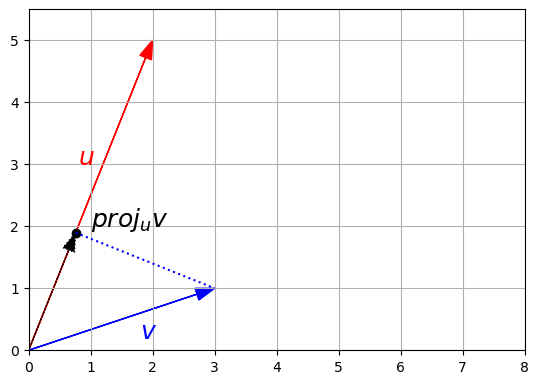

In [27]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()



# Matrices

A matrix is a rectangular array of scalars (i.e. any number: integer, real or complex) arranged in rows and columns, for example:

$$ \begin{bmatrix}
10 & 20 & 30 \\
40 & 50 & 60
\end{bmatrix} $$

You can also think of a matrix as a list of vectors: the previous matrix contains either 2 horizontal 3D vectors or 3 vertical 2D vectors.

Matrices are convenient and very efficient to run operations on many vectors at a time. We will also see that they are great at representing and performing linear transformations such as rotations, translations, and scaling.

## Matrices in Python

In Python, a matrix can be represented in various ways. The simplest is just a list of Python lists:

In [28]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

A much more efficient way is to use the NumPy library which provides optimized implementations of many matrix operations:

In [29]:
A = np.array([
    [10,20,30],
    [40,50,60]
])
A

array([[10, 20, 30],
       [40, 50, 60]])

By convention matrices generally have uppercase names, such as $\textbf{A}
.

In the rest of this tutorial, we will assume that we are using NumPy arrays (type ndarray) to represent matrices.


## size

the size of a matrix is defined by its number of rows and number of columns. it is noted *rows* × *columns*. for example, the matrix $A$ above is an example of a $2 \times 3$ matrix: 2 rows, 3 columns. caution: a $3 \times 2$ matrix would have 3 rows and 2 columns.

to get a matrix's size in numpy:

```python
A.shape
```
(2, 3)


**caution:** the `size` attribute represents the number of elements in the `ndarray`, not the matrix's size:

A.size

6


## element indexing

the number located in the $i^{th}$ row, and $j^{th}$ column of a matrix $X$ is sometimes noted $X_{i,j}$ or $X_{ij}$, but there is no standard notation, so people often prefer to explicitly name the elements, like this: "let $X = (x_{i,j})_{1 \leq i \leq m, 1 \leq j \leq n}$". this means that $X$ is equal to:

$$
X =
\begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,n} \\
x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,n} \\
x_{3,1} & x_{3,2} & x_{3,3} & \dots & x_{3,n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
x_{m,1} & x_{m,2} & x_{m,3} & \dots & x_{m,n}
\end{bmatrix}
$$

however, in this notebook we will use the $X_{i,j}$ notation, as it matches fairly well numpy's notation. note that in math indices generally start at 1, but in programming they usually start at 0. so to access $A_{2,3}$ programmatically, we need to write this:

In [30]:
A[1,2]  # 2nd row, 3rd column

60


the $i^{th}$ row vector is sometimes noted $M_{i,*}$ or $M_i^*$, but again there is no standard notation so people often prefer to explicitly define their own names, for example: "let $x_k$ be the $i^{th}$ row vector of matrix $X$". we will use the $M_{i,*}$ for the same reason as above. for example, to access $A_{2,*}$, (i.e. $A$'s 2nd row vector):

```
A[1,:]  # 2nd row vector (as a 1D array)
```

```
array([40, 50, 60])
```

similarly, the $j^{th}$ column vector is sometimes noted $M_{*,j}$ or $M_j^*$, but there is no standard notation. we will use $M_{*,j}$. for example, to access $A_{*,3}$ (i.e. $A$'s 3rd column vector):

```
A[:,2]  # 3rd column vector (as a 1D array)
```

```
array([30, 60])
```

note that the result is actually a one-dimensional numpy array: there is no such thing as a *vertical* or *horizontal* one-dimensional array. if you need to actually represent a row vector as a one-row matrix (i.e. a 2D numpy array), or a column vector as a one-column matrix, then you need to use a slice instead of an integer when accessing the row or column, for example:

```
A[1:2, :]  # rows 2 to 3 (excluded): this returns row 2 as a one-row matrix
```

```
array([[40, 50, 60]])
```

```
A[:,2:3]  # columns 3 to 4 (excluded): this returns column 3 as a one-column matrix
```

```
array([[30],
       [60]])
```

## square, triangular, diagonal and identity matrices

a *square matrix* is a matrix that has the same number of rows and columns, for example a $3 \times 3$ matrix:

$$
\begin{bmatrix}
4 & 9 & 2 \\
3 & 5 & 7 \\
8 & 1 & 6
\end{bmatrix}
$$

an *upper triangular matrix* is a special kind of square matrix where all the elements *below* the main diagonal (top-left to bottom-right) are zero, for example:

$$
\begin{bmatrix}
4 & 9 & 2 \\
0 & 5 & 7 \\
0 & 0 & 6
\end{bmatrix}
$$



similarly, a *lower triangular matrix* is a square matrix where all elements *above* the main diagonal are zero, for example:

$$
\begin{bmatrix}
4 & 0 & 0 \\
3 & 5 & 0 \\
8 & 1 & 6
\end{bmatrix}
$$

a *triangular matrix* is one that is either lower triangular or upper triangular.

a matrix that is both upper and lower triangular is called a *diagonal matrix*, for example:

$$
\begin{bmatrix}
4 & 0 & 0 \\
0 & 5 & 0 \\
0 & 0 & 6
\end{bmatrix}
$$

you can construct a diagonal matrix using numpy's `diag` function:

```
np.diag([4, 5, 6])
```

```
array([[4, 0, 0],
       [0, 5, 0],
       [0, 0, 6]])
```

if you pass a matrix to the `diag` function, it will happily extract the diagonal values:

```
D = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
np.diag(D)
```

```
array([1, 5, 9])
```

finally, the *identity matrix* of size $n$, noted $I_n$, is a diagonal matrix of size $n \times n$ with 1's in the main diagonal, for example $I_3$:

$$
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

numpy's `eye` function returns the identity matrix of the desired size:

```
np.eye(3)
```

```
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

the identity matrix is often noted simply $I$ (instead of $I_n$) when its size is clear given the context. it is called the *identity matrix* because multiplying a matrix with it leaves the matrix unchanged as we will see below.


# Adding matrices

If two matrices \( Q \) and \( R \) have the same size \( m \times n \), they can be added together. Addition is performed _elementwise_: the result is also an \( m \times n \) matrix \( S \) where each element is the sum of the elements at the corresponding position: 

$$ S_{i,j} = Q_{i,j} + R_{i,j} $$

$$ S =
\begin{bmatrix}
Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n} \\
Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}
\end{bmatrix} $$

For example, let's create a \( 2 \times 3 \) matrix \( B \) and compute \( A + B \):

In [31]:
B = np.array([[1, 2, 3], [4, 5, 6]])
B

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [33]:
A + B

array([[11, 22, 33],
       [44, 55, 66]])

**Addition is *commutative***, meaning that $ A+B = B+A$

In [34]:
B+A

array([[11, 22, 33],
       [44, 55, 66]])

**It is also *associative***, meaning that $A+(B+C)=(A+B)+C$

In [35]:
C = np.array([[100, 200, 300], [400, 500, 600]])

A + (B + C)

array([[111, 222, 333],
       [444, 555, 666]])

In [36]:
(A + B) + C

array([[111, 222, 333],
       [444, 555, 666]])

# Scalar multiplication

A matrix \( M \) can be multiplied by a scalar \( \lambda \). The result is noted \( \lambda M \), and it is a matrix of the same size as \( M \) with all elements multiplied by \( \lambda \):

$$ \lambda M =
\begin{bmatrix}
\lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
\lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
\lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn}
\end{bmatrix} $$

A more concise way of writing this is:

$$ (\lambda M)_{i,j} = \lambda (M)_{i,j} $$

In NumPy, simply use the `*` operator to multiply a matrix by a scalar. For example:

In [37]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Scalar multiplication is also defined on the right-hand side, and gives the same result: $M \lambda = \lambda M$. For example:

In [38]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

This makes scalar **multiplication** commutative.

It is also **associative**, meaning that $\alpha(\beta M)=(\alpha \times \beta) M$, where $\alpha$ and 
$\beta$ are scalars. For example:

In [39]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [40]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Finally, it is distributive over addition of matrices, meaning that $ \lambda (Q+R)=\lambda Q + \lambda R$

In [41]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [42]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

## Matrix multiplication
So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.
A matrix $Q$ of size $m \times n$ can be multiplied by a matrix $R$ of size $n \times q$. It is noted simply $Q R$ without multiplication sign or dot. The result $P$ is an $m \times q$ matrix where each element is computed as a sum of products:

$$
P_{i, j}=\sum_{k=1}^n Q_{i, k} \times R_{k, j}
$$


The element at position $i, j$ in the resulting matrix is the sum of the products of elements in row $i$ of matrix $Q$ by the elements in column $j$ of matrix $R$.

$$
P=\left[\begin{array}{cccc}
Q_{11} R_{11}+Q_{12} R_{21}+\cdots+Q_{1 n} R_{n 1} & Q_{11} R_{12}+Q_{12} R_{22}+\cdots+Q_{1 n} R_{n 2} & \cdots & Q_{11} R_{1 q}+Q_{12} R_{2 q}+\cdots+Q_{1 n} R_{n q} \\
Q_{21} R_{11}+Q_{22} R_{21}+\cdots+Q_{2 n} R_{n 1} & Q_{21} R_{12}+Q_{22} R_{22}+\cdots+Q_{2 n} R_{n 2} & \cdots & Q_{21} R_{1 q}+Q_{22} R_{2 q}+\cdots+Q_{2 n} R_{n q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m 1} R_{11}+Q_{m 2} R_{21}+\cdots+Q_{m n} R_{n 1} & Q_{m 1} R_{12}+Q_{m 2} R_{22}+\cdots+Q_{m n} R_{n 2} & \cdots & Q_{m 1} R_{1 q}+Q_{m 2} R_{2 q}+\cdots+Q_{m n} R_{n q}
\end{array}\right]
$$


You may notice that each element $P_{i, j}$ is the dot product of the row vector $Q_{i, *}$ and the column vector $R_{*, j}$ :

$$
P_{i, j}=Q_{i, *} \cdot R_{*, j}
$$


So we can rewrite $P$ more concisely as:

$$
P=\left[\begin{array}{cccc}
Q_{1, *} \cdot R_{*, 1} & Q_{1, *} \cdot R_{*, 2} & \cdots & Q_{1, *} \cdot R_{*, q} \\
Q_{2, *} \cdot R_{*, 1} & Q_{2, *} \cdot R_{*, 2} & \cdots & Q_{2, *} \cdot R_{*, q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m, *} \cdot R_{*, 1} & Q_{m, *} \cdot R_{*, 2} & \cdots & Q_{m, *} \cdot R_{*, q}
\end{array}\right]
$$


Let's multıply two matrices in Numły, using ndarray 's np.matmul() tunction:

$$
E=A D=\left[\begin{array}{lll}
10 & 20 & 30 \\
40 & 50 & 60
\end{array}\right]\left[\begin{array}{cccc}
2 & 3 & 5 & 7 \\
11 & 13 & 17 & 19 \\
23 & 29 & 31 & 37
\end{array}\right]=\left[\begin{array}{cccc}
930 & 1160 & 1320 & 1560 \\
2010 & 2510 & 2910 & 3450
\end{array}\right]
$$


In [43]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = np.matmul(A, D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Python 3.5 introduced the @ infix operator for matrix multiplication, and NumPy 1.10 added support for it. A @ D is equivalent to np.matmul(A, D):

In [44]:
A @ D

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

The @ operator also works for vectors. u @ v computes the dot product of u and v:

In [45]:
u @ v

11

Let's check this result by looking at one element, just to be sure. To calculate $E_{2,3}$ for example, we need to multiply elements in $A$'s $2^{nd}$ row by elements in $D$'s $3^{rd}$ column, and sum up these products:

In [46]:
40*5 + 50*17 + 60*31

2910

In [47]:
E[1,2]  # row 2, column 3

2910

Looks good! You can check the other elements until you get used to the algorithm.

We multiplied a \(2 \times 3\) matrix by a \(3 \times 4\) matrix, so the result is a \(2 \times 4\) matrix. The first matrix's number of columns has to be equal to the second matrix's number of rows. If we try to multiply \(D\) by \(A\), we get an error because \(D\) has 4 columns while \(A\) has 2 rows:

In [48]:
try:
    D @ A
except ValueError as e:
    print("ValueError:", e)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)



This illustrates the fact that **matrix multiplication is _not_ commutative**: in general \(QR \neq RQ\).

In fact, \(QR\) and \(RQ\) are only *both* defined if \(Q\) has size \(m \times n\) and \(R\) has size \(n \times m\). Let's look at an example where both *are* defined and show that they are (in general) *not* equal:

In [49]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A @ F

array([[400, 130],
       [940, 310]])

In [50]:
F @ A

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

On the other hand, **matrix multiplication is associative**, meaning that $Q(RS)=(QR)S$. Let's create a $4 \times 5$ matrix $G$ to illustrate this:

In [51]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
(A @ D) @ G     # (AD)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [52]:
A @ (D @ G)     # A(DG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])


It is also ***distributive* over addition** of matrices, meaning that  $(Q+R)S=QS+RS$. For example:

In [53]:

(A + B) @ D

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [54]:
A @ D + B @ D

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

The product of a matrix $M$
 by the identity matrix (of matching size) results in the same matrix $M$
. More formally, if $M$ 
 is an $m \times n$
 matrix, then:

$M I_n = I_n M = M$

This is generally written more concisely (since the size of the identity matrices is unambiguous given the context):

$MI=IM=M$

For example:

In [55]:
A @ np.eye(3)

array([[10., 20., 30.],
       [40., 50., 60.]])

In [56]:
np.eye(2) @ A

array([[10., 20., 30.],
       [40., 50., 60.]])

**Caution**: NumPy's * operator performs elementwise multiplication, NOT a matrix multiplication:

In [57]:
A * B   # NOT a matrix multiplication

array([[ 10,  40,  90],
       [160, 250, 360]])

# Matrix Transpose

# Matrix transpose

The transpose of a matrix \( M \) is a matrix noted \( M^T \) such that the \( i \)-th row in \( M^T \) is equal to the \( i \)-th column in \( M \):

$$ A^T = \begin{bmatrix}
10 & 20 & 30 \\
40 & 50 & 60
\end{bmatrix}^T 
= 
\begin{bmatrix}
10 & 40 \\
20 & 50 \\
30 & 60
\end{bmatrix} $$

In other words, \( (A^T)_{i,j} = A_{j,i} \).

Obviously, if \( M \) is an \( m \times n \) matrix, then \( M^T \) is an \( n \times m \) matrix.

Note: there are a few other notations, such as \( M^t, M^I, \) or \( tM \).

In NumPy, a matrix's transpose can be obtained simply using the \( T \) attribute:

In [58]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [59]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

As you might expect, transposing a matrix twice returns the original matrix:

In [60]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is distributive over addition of matrices, meaning that $(Q+R)^T = Q^T + R^T$. For example:

In [61]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [62]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Moreover, \( (Q \cdot R)^T = R^T \cdot Q^T \). Note that the order is reversed. For example:


In [63]:
(A @ D).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [64]:
D.T @ A.T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

A symmetric matrix \( M \) is defined as a matrix that is equal to its transpose: \( M^T = M \). This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal, for example:

\[
\begin{bmatrix}
17 & 22 & 27 & 49 \\
22 & 29 & 36 & 0 \\
27 & 36 & 45 & 2 \\
49 & 0 & 2 & 99
\end{bmatrix}
\]

The product of a matrix by its transpose is always a symmetric matrix, for example:



In [65]:
D @ D.T

array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])


## Converting 1D arrays to 2D arrays in NumPy

As we mentioned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

In [66]:
u

array([2, 5])

In [67]:
u.T

array([2, 5])

We want to convert $u$
 into a row vector before transposing it. There are a few ways to do this:

In [68]:
u_row = np.array([u])
u_row

array([[2, 5]])

Notice the extra square brackets: this is a 2D array with just one row (i.e. a $ 1 \times 2$ matrix). In other words, it really is a **row vector**.

In [69]:
u[np.newaxis, :]

array([[2, 5]])

This is quite explicit: we are asking for a new vertical axis, keeping the existing data as the horizontal axis.

In [70]:
u[np.newaxis]

array([[2, 5]])

This is equivalent, but a little less explicit.

In [71]:
u[None]

array([[2, 5]])

This is the shortest version, but you probably want to avoid it because it is unclear. The reason it works is that np.newaxis is actually equal to None, so this is equivalent to the previous version.

Ok, now let's transpose our row vector:

In [72]:
u_row.T

array([[2],
       [5]])

Great! We now have a nice **column vector**.

Rather than creating a row vector then transposing it, it is also possible to convert a 1D array directly into a column vector:

In [73]:
u[:, np.newaxis]

array([[2],
       [5]])

## Plotting a matrix
We have already seen that vectors can be represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$
 matrix $P$ and plot it as points:

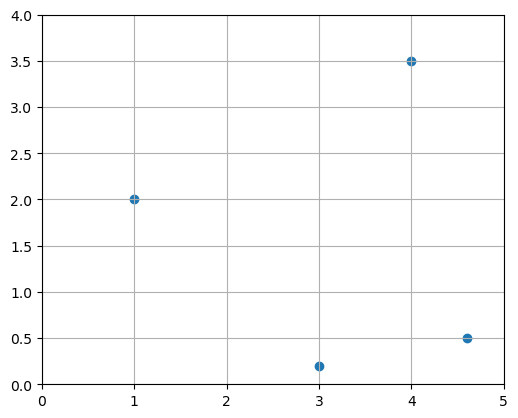

In [74]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()


Of course, we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a $4 \times 2$
 matrix (the transpose of $P$
, in fact). It is really an arbitrary choice.

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

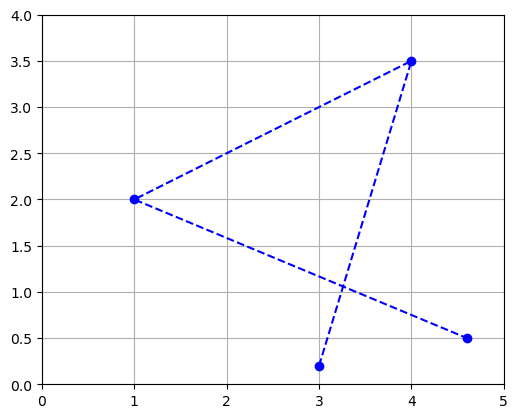

In [75]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's Polygon class expects an $n \times 2$
 NumPy array, not a 
 $2 \times n$ array, so we just need to give it 
$P^T$:

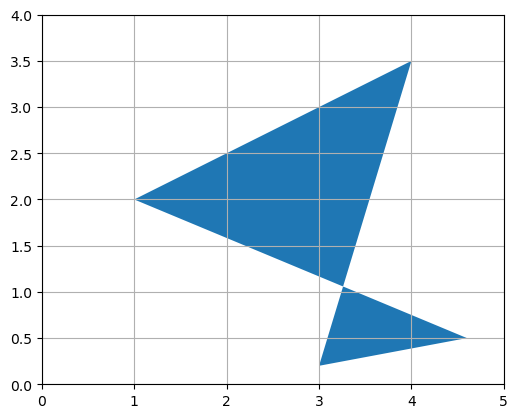

In [76]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## Geometric applications of matrix operations
We saw earlier that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin), and vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate.

Similarly, matrix operations have very useful geometric applications.

### Addition = multiple geometric translations
First, adding two matrices together is equivalent to adding all their vectors together. For example, let's create a $2 \times 4$
 matrix $H$
 and add it to 
$P$, and look at the result:

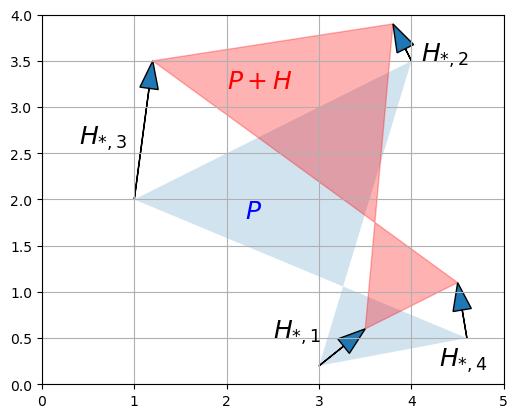

In [77]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.3, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

If we add a matrix full of identical vectors, we get a simple geometric translation:

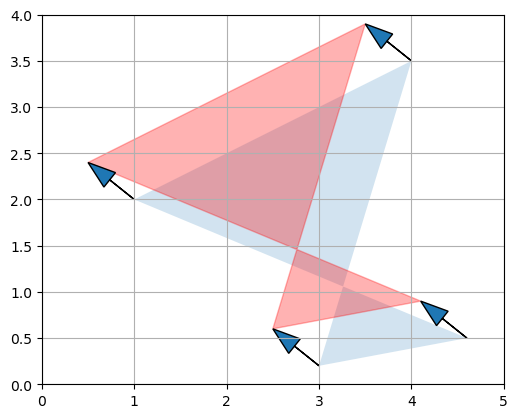

In [78]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Although matrices can only be added together if they have the same size, NumPy allows adding a row vector or a column vector to a matrix: this is called *broadcasting* and is explained in further details in the NumPy tutorial. We could have obtained the same result as above with:

In [79]:
P + [[-0.5], [0.4]]  # same as P + H2, thanks to NumPy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

## Scalar multiplication
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):

A matrix \( M \) can be multiplied by a scalar \( \lambda \). The result is noted \( \lambda M \), and it is a matrix of the same size as \( M \) with all elements multiplied by \( \lambda \):

$$
\lambda M = 
\begin{bmatrix}
\lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
\lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
\lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn}
\end{bmatrix}
$$ 

A more concise way of writing this is:


$$ (\lambda M)_{i,j} = \lambda (M)_{i,j} $$

In NumPy, simply use the `*` operator to multiply a matrix by a scalar. For example:


In [80]:
2 * A

array([[ 20,  40,  60],
       [ 80, 100, 120]])

Scalar multiplication is also defined on the right-hand side, and gives the same result: $ M \lambda = \lambda M$. For example:

In [81]:
A * 2

array([[ 20,  40,  60],
       [ 80, 100, 120]])

This makes scalar multiplication commutative.

It is also associative, meaning that $ \alpha (\beta M) = (\alpha \times \beta) M$
, where $\alpha$
 and $\beta$
 are scalars. For example:

In [82]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [83]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

Finally, it is distributive over addition of matrices, meaning that  $\lambda(Q+R)=\lambda Q + \lambda R$:

In [84]:
2 * (A + B)

array([[ 22,  44,  66],
       [ 88, 110, 132]])

In [85]:
2 * A + 2 * B

array([[ 22,  44,  66],
       [ 88, 110, 132]])

## Matrix multiplication

So far, matrix operations have been rather intuitive. But multiplying matrices is a bit more involved.

A matrix \( Q \) of size \( m \times n \) can be multiplied by a matrix \( R \) of size \( n \times q \). It is noted simply \( QR \) without multiplication sign or dot. The result \( P \) is an \( m \times q \) matrix where each element is computed as a sum of products:


$$ P_{i,j} = \sum_{n=1}^{n} Q_{i,k} \times R_{k,j} $$ 

The element at position \( i,j \) in the resulting matrix is the sum of the products of elements in row \( i \) of matrix \( Q \) by the elements in column \( j \) of matrix \( R \).

$$ 
P = 
\begin{bmatrix}
Q_{11}R_{11} + Q_{12}R_{21} + \cdots + Q_{1n}R_{n1} & Q_{11}R_{12} + Q_{12}R_{22} + \cdots + Q_{1n}R_{n2} & \cdots & Q_{11}R_{1q} + Q_{12}R_{2q} + \cdots + Q_{1n}R_{nq} \\
Q_{21}R_{11} + Q_{22}R_{21} + \cdots + Q_{2n}R_{n1} & Q_{21}R_{12} + Q_{22}R_{22} + \cdots + Q_{2n}R_{n2} & \cdots & Q_{21}R_{1q} + Q_{22}R_{2q} + \cdots + Q_{2n}R_{nq} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m1}R_{11} + Q_{m2}R_{21} + \cdots + Q_{mn}R_{n1} & Q_{m1}R_{12} + Q_{m2}R_{22} + \cdots + Q_{mn}R_{n2} & \cdots & Q_{m1}R_{1q} + Q_{m2}R_{2q} + \cdots + Q_{mn}R_{nq}
\end{bmatrix}
$$ 

You may notice that each element \( P_{i,j} \) is the dot product of the row vector \( Q_{i,*} \) and the column vector \( R_{*,j} \):

$$ 
P_{i,j} = Q_{i,*} \cdot R_{*,j}
$$ 

So we can rewrite \( P \) more concisely as:

$$ 
P = 
\begin{bmatrix}
Q_{1,*} \cdot R_{*,1} & Q_{1,*} \cdot R_{*,2} & \cdots & Q_{1,*} \cdot R_{*,q} \\
Q_{2,*} \cdot R_{*,1} & Q_{2,*} \cdot R_{*,2} & \cdots & Q_{2,*} \cdot R_{*,q} \\
\vdots & \vdots & \ddots & \vdots \\
Q_{m,*} \cdot R_{*,1} & Q_{m,*} \cdot R_{*,2} & \cdots & Q_{m,*} \cdot R_{*,q}
\end{bmatrix}
$$ 

Let's multiply two matrices in NumPy, using `ndarray`'s `np.matmul()` function:

$$ 
E = A \times D = 
\begin{bmatrix}
10 & 20 & 30 \\
40 & 50 & 60
\end{bmatrix}
\times
\begin{bmatrix}
2 & 3 & 5 & 7 \\
11 & 13 & 17 & 19 \\
23 & 29 & 31 & 37
\end{bmatrix}
=
\begin{bmatrix}
930 & 1160 & 1320 & 1560 \\
2010 & 2510 & 2910 & 3450
\end{bmatrix}
$$ 

In [86]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = np.matmul(A, D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

Python 3.5 introduced the @ infix operator for matrix multiplication, and NumPy 1.10 added support for it. A @ D is equivalent to np.matmul(A, D):

In [87]:
A @ D

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

The @ operator also works for vectors. u @ v computes the dot product of u and v:

In [88]:
u @ v

11

Let's check this result by looking at one element, just to be sure. To calculate $E_{2,3}$ for example, we need to multiply elements in 
$A$'s $2^{nd}$ row by elements in $D$'s $3^{rd}$ column, and sum up these products:

In [89]:

40*5 + 50*17 + 60*31

2910

In [90]:
E[1,2]  # row 2, column 3

2910

Looks good! You can check the other elements until you get used to the algorithm.

We multiplied a $ 2 \times 3$ matrix by a 
$3 \times 4$ matrix, so the result is a 
$2 \times 4$ matrix. The first matrix's number of columns has to be equal to the second matrix's number of rows. If we try to multiply $D$
 by 
$A$, we get an error because D has 4 columns while A has 2 rows:

In [91]:
try:
    D @ A
except ValueError as e:
    print("ValueError:", e)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)


This illustrates the fact that matrix multiplication is NOT commutative: in general $QR \neq RQ$
.

In fact, $QR$
 and $RQ$
 are only both defined if $Q$
 has size $m \times n$
 and $R$
 has size $n \times m$ 
. Let's look at an example where both are defined and show that they are (in general) NOT equal:

In [92]:
F = np.array([
        [5,2],
        [4,1],
        [9,3]
    ])
A @ F

array([[400, 130],
       [940, 310]])

In [93]:
F @ A

array([[130, 200, 270],
       [ 80, 130, 180],
       [210, 330, 450]])

On the other hand, **matrix multiplication *is* associative**, meaning that $Q(RS)=(QR)S$
. Let's create a $4 \times 5$
 matrix $G$
 to illustrate this:

In [94]:
G = np.array([
        [8,  7,  4,  2,  5],
        [2,  5,  1,  0,  5],
        [9, 11, 17, 21,  0],
        [0,  1,  0,  1,  2]])
(A @ D) @ G     # (AD)G

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

In [95]:
A @ (D @ G)     # A(DG)

array([[21640, 28390, 27320, 31140, 13570],
       [47290, 62080, 60020, 68580, 29500]])

It is also ***distributive* over addition** of matrices, meaning that 
$(Q+R)S=QS+RS$. For example:

In [96]:
(A + B) @ D

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

In [97]:
A @ D + B @ D

array([[1023, 1276, 1452, 1716],
       [2211, 2761, 3201, 3795]])

The product of a matrix  $M$  by the identity matrix (of matching size) results in the same matrix  $M$ . More formally, if $M$$ is an $ m \times n $ matrix, then:


$ MI_n = I_m M = M $


This is generally written more concisely (since the size of the identity matrices is unambiguous given the context):

$ MI = IM = M$

For example:



In [98]:
A @ np.eye(3)

array([[10., 20., 30.],
       [40., 50., 60.]])

In [99]:
np.eye(2) @ A

array([[10., 20., 30.],
       [40., 50., 60.]])


**Caution:** NumPy’s `*` operator performs elementwise multiplication, **NOT** a **matrix multiplication**:



In [100]:
A * B

array([[ 10,  40,  90],
       [160, 250, 360]])

---

## Matrix transpose

The transpose of a matrix $M$ is a matrix noted $M$ such that the $ i^{th} $ row in $ M^T $ is equal to the $ i^{th} $ column in $ M $:

$$ A^T = 
\begin{bmatrix}
10 & 20 & 30 \\
40 & 50 & 60 
\end{bmatrix}^T
=
\begin{bmatrix}
10 & 40 \\
20 & 50 \\
30 & 60 
\end{bmatrix} $$

In other words, $ (A^T)_{i,j} = A_{j,i} $

Obviously, if $M$ is an $ m \times n $ matrix, then $M^T $ is an $n \times m $ matrix.

Note: there are a few other notations, such as $ M' $, $ M^t $, or $ ^tM $.

In NumPy, a matrix’s transpose can be obtained simply using the `.T` attribute:


In [101]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

As you might expect, transposing a matrix twice returns the original matrix:

In [102]:

A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Transposition is distributive over addition of matrices, meaning that 
$(Q+R)^T = Q^T+R^T$. For example:

In [103]:
(A + B).T

array([[11, 44],
       [22, 55],
       [33, 66]])

In [104]:
A.T + B.T

array([[11, 44],
       [22, 55],
       [33, 66]])

Moreover, $(Q \cdot R)^T = R^T \cdot Q^T$
. Note that the order is reversed. For example:

In [105]:
(A @ D).T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

In [106]:
D.T @ A.T

array([[ 930, 2010],
       [1160, 2510],
       [1320, 2910],
       [1560, 3450]])

A **symmetric matrix** \( M \) is defined as a matrix that is equal to its transpose: \( M^T = M \). This definition implies that it must be a square matrix whose elements are symmetric relative to the main diagonal, for example:

\[
\begin{bmatrix}
17 & 22 & 27 & 49 \\
22 & 29 & 36 & 0 \\
27 & 36 & 45 & 2 \\
49 & 0 & 2 & 99
\end{bmatrix}
\]

The product of a matrix by its transpose is always a symmetric matrix, for example:

In [107]:
D @ D.T


array([[  87,  279,  547],
       [ 279,  940, 1860],
       [ 547, 1860, 3700]])

## Converting 1D arrays to 2D arrays in NumPy

As we mentioned earlier, in NumPy (as opposed to Matlab, for example), 1D really means 1D: there is no such thing as a vertical 1D-array or a horizontal 1D-array. So you should not be surprised to see that transposing a 1D array does not do anything:

In [108]:
u

array([2, 5])

In [109]:
u.T

array([2, 5])

We want to convert $\textbf{u}$
 into a row vector before transposing it. There are a few ways to do this:

In [110]:
u_row = np.array([u])
u_row

array([[2, 5]])

Notice the extra square brackets: this is a 2D array with just one row (i.e. a $1 \times 2$
 matrix). In other words, it really is a **row vector**.

In [111]:
u[np.newaxis, :]

array([[2, 5]])

This is quite explicit: we are asking for a new vertical axis, keeping the existing data as the horizontal axis.

In [112]:
u[np.newaxis]

array([[2, 5]])

This is equivalent, but a little less explicit.

In [113]:
u[None]

array([[2, 5]])

This is the shortest version, but you probably want to avoid it because it is unclear. The reason it works is that ```np.newaxis``` is actually equal to ```None```, so this is equivalent to the previous version.

Ok, now let's transpose our row vector:

In [114]:
u_row.T

array([[2],
       [5]])

Great! We now have a nice **column vector**.

Rather than creating a row vector then transposing it, it is also possible to convert a 1D array directly into a column vector:

In [115]:

u[:, np.newaxis]

array([[2],
       [5]])

## Plotting a matrix
We have already seen that vectors can be represented as points or arrows in N-dimensional space. Is there a good graphical representation of matrices? Well you can simply see a matrix as a list of vectors, so plotting a matrix results in many points or arrows. For example, let's create a $2 \times 4$
 matrix P and plot it as points:

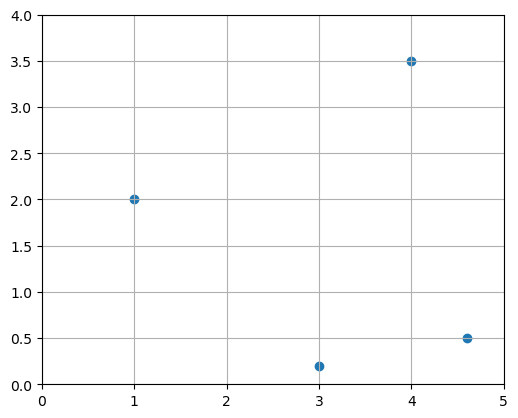

In [116]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Of course, we could also have stored the same 4 vectors as row vectors instead of column vectors, resulting in a 
$4 \times 2$ matrix (the transpose of 
$P$, in fact). It is really an arbitrary choice.

Since the vectors are ordered, you can see the matrix as a path and represent it with connected dots:

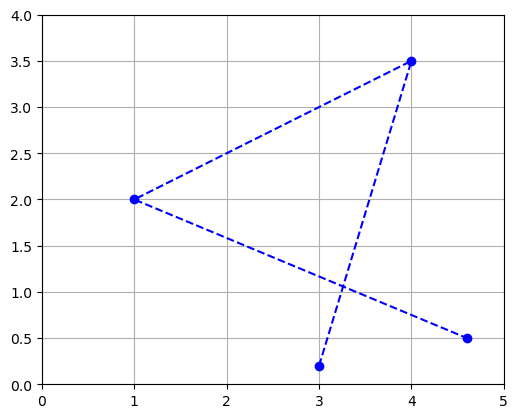

In [117]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Or you can represent it as a polygon: matplotlib's Polygon class expects an $n \times 2$ 
 NumPy array, not a $2 \times n$
 array, so we just need to give it $P^T$ 
:

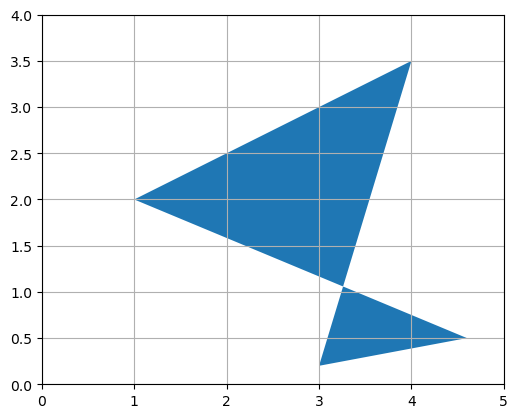

In [118]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## Geometric applications of matrix operations
We saw earlier that vector addition results in a geometric translation, vector multiplication by a scalar results in rescaling (zooming in or out, centered on the origin), and vector dot product results in projecting a vector onto another vector, rescaling and measuring the resulting coordinate.

Similarly, matrix operations have very useful geometric applications.

### Addition = multiple geometric translations
First, adding two matrices together is equivalent to adding all their vectors together. For example, let's create a 
$2 \times 4$ matrix $H$ 
 and add it to $P$
, and look at the result:

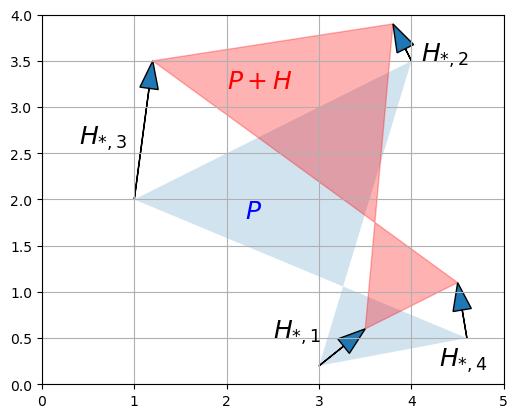

In [119]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.3, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

If we add a matrix full of identical vectors, we get a simple geometric translation:

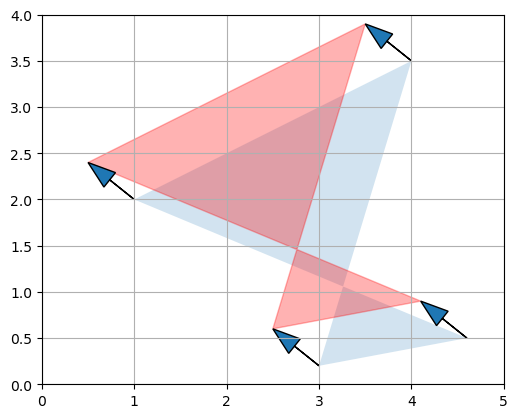

In [120]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

Although matrices can only be added together if they have the same size, NumPy allows adding a row vector or a column vector to a matrix: this is called broadcasting and is explained in further details in the NumPy tutorial. We could have obtained the same result as above with:

In [121]:
P + [[-0.5], [0.4]]  # same as P + H2, thanks to NumPy broadcasting

array([[2.5, 3.5, 0.5, 4.1],
       [0.6, 3.9, 2.4, 0.9]])

## Scalar multiplication
Multiplying a matrix by a scalar results in all its vectors being multiplied by that scalar, so unsurprisingly, the geometric result is a rescaling of the entire figure. For example, let's rescale our polygon by a factor of 60% (zooming out, centered on the origin):/